In [ ]:
from google.colab import drive
drive.mount('/content/drive')

### Installing libraries

In [ ]:
!pip install transformers
!pip install ultralytics torch

### Load the image

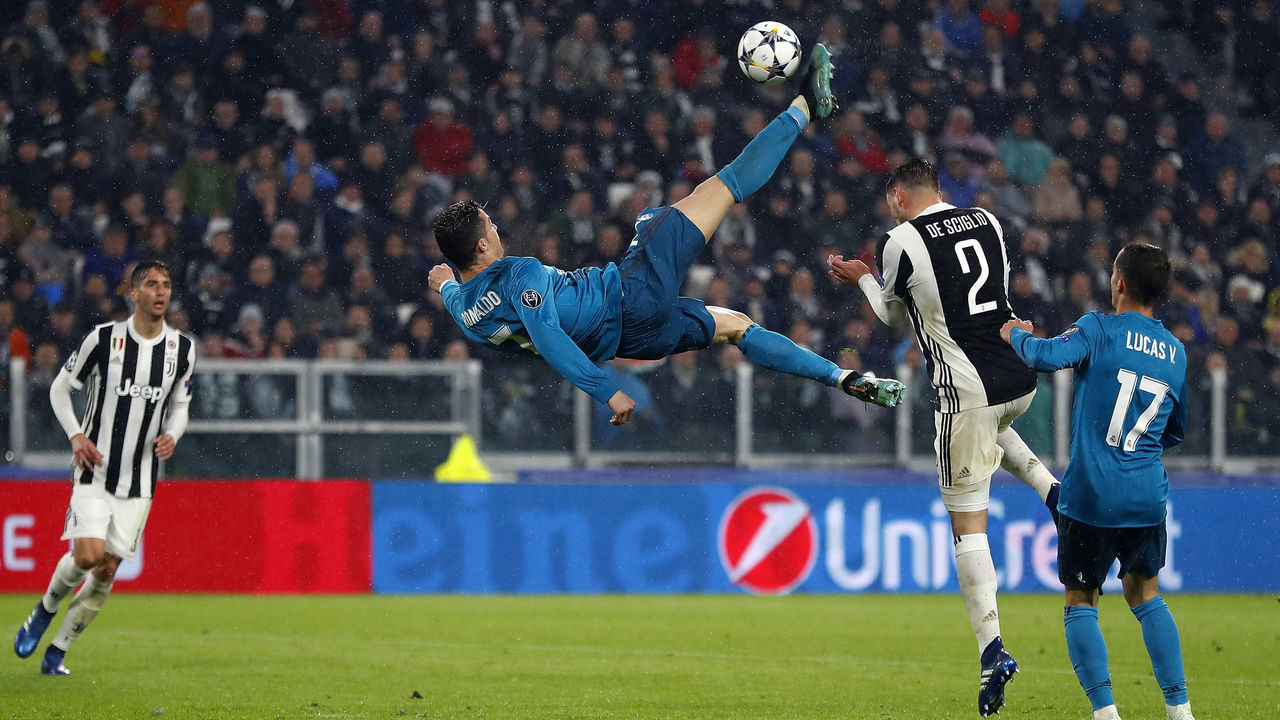

In [13]:
from PIL import Image

# Display the images
raw_image = Image.open("ronaldo-bicycle.jpeg")
raw_image

### Get bounding boxes with OWL-ViT object detection model

In [14]:
from transformers import pipeline

In [15]:
OWL_checkpoint = "google/owlvit-base-patch32"

* Build the pipeline for the detector model.

In [16]:
# Load the model
detector = pipeline(
    model= OWL_checkpoint,
    task="zero-shot-object-detection"
)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/4.42k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/613M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/775 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/392 [00:00<?, ?B/s]

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration. Please open a PR/issue to update `preprocessor_config.json` to use `image_processor_type` instead of `feature_extractor_type`. This warning will be removed in v4.40.


In [36]:
# What to identify in the image
text_prompt = ["player who did the bicycle kick", "ball"]

In [39]:
output = detector(
    raw_image,
    candidate_labels = text_prompt
)

# Print the output to identify the bounding boxes detected
output

[{'score': 0.2689833641052246,
  'label': 'ball',
  'box': {'xmin': 733, 'ymin': 18, 'xmax': 806, 'ymax': 78}},
 {'score': 0.1212724894285202,
  'label': 'player who did the bicycle kick',
  'box': {'xmin': 423, 'ymin': 61, 'xmax': 891, 'ymax': 436}}]

In [56]:
from utils import preprocess_outputs
from utils import show_boxes_and_labels_on_image
from utils import show_masks_on_image

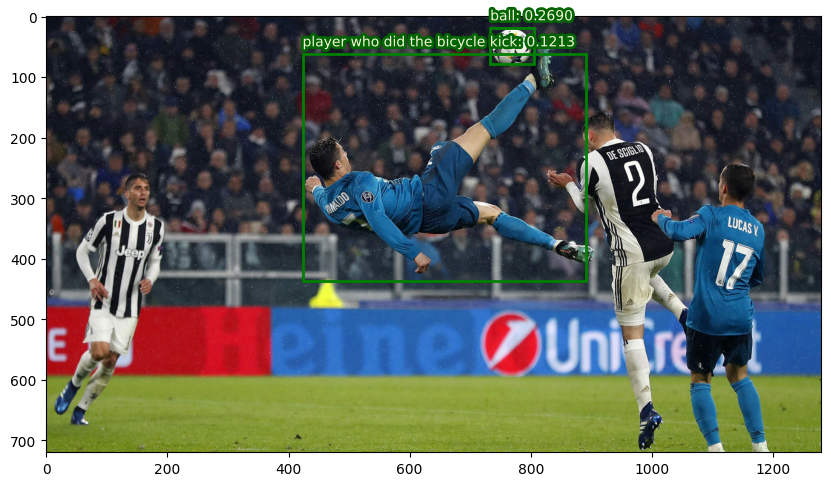

In [44]:
input_scores, input_labels, input_boxes = preprocess_outputs(output)

# Show the image with the bounding boxes
show_boxes_and_labels_on_image(
    raw_image,
    input_boxes[0],
    input_labels,
    input_scores
)

### Get segmentation masks using Mobile SAM

In [45]:
# Load the SAM model from the imported ultralytics library
from ultralytics import SAM

In [46]:
SAM_version = "/content/drive/MyDrive/mobile_sam.pt"
model = SAM(SAM_version)

Info about [mobile_sam.pt](https://docs.ultralytics.com/models/mobile-sam/)

* Generate an array using numpy.

In [48]:
import numpy as np

In [49]:
len(output)

2

In [52]:
labels = np.repeat(1, len(output))
labels

array([1, 1])

In [54]:
result = model.predict(
    raw_image,
    bboxes=input_boxes[0],
    labels=labels
)

result


0: 1024x1024 120.5ms
Speed: 14.4ms preprocess, 120.5ms inference, 7.3ms postprocess per image at shape (1, 3, 1024, 1024)


[ultralytics.engine.results.Results object with attributes:
 
 boxes: None
 keypoints: None
 masks: ultralytics.engine.results.Masks object
 names: {0: '0', 1: '1'}
 obb: None
 orig_img: array([[[ 28,  16,  16],
         [ 27,  15,  13],
         [ 27,  15,  13],
         ...,
         [ 43,  31,  29],
         [ 43,  31,  29],
         [ 32,  20,  18]],
 
        [[ 28,  16,  16],
         [ 27,  15,  13],
         [ 27,  15,  13],
         ...,
         [ 41,  29,  27],
         [ 44,  32,  30],
         [ 37,  25,  23]],
 
        [[ 28,  16,  16],
         [ 27,  15,  13],
         [ 27,  15,  13],
         ...,
         [ 40,  28,  26],
         [ 41,  29,  27],
         [ 34,  22,  20]],
 
        ...,
 
        [[  9, 119,  95],
         [ 24, 134, 110],
         [ 43, 151, 128],
         ...,
         [ 24, 129, 108],
         [ 31, 136, 115],
         [ 34, 139, 118]],
 
        [[  2, 112,  88],
         [ 16, 126, 102],
         [ 37, 145, 122],
         ...,
         [ 27, 

In [55]:
masks = result[0].masks.data
masks

tensor([[[False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         ...,
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False]],

        [[False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         ...,
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False]]], device='cuda:0')

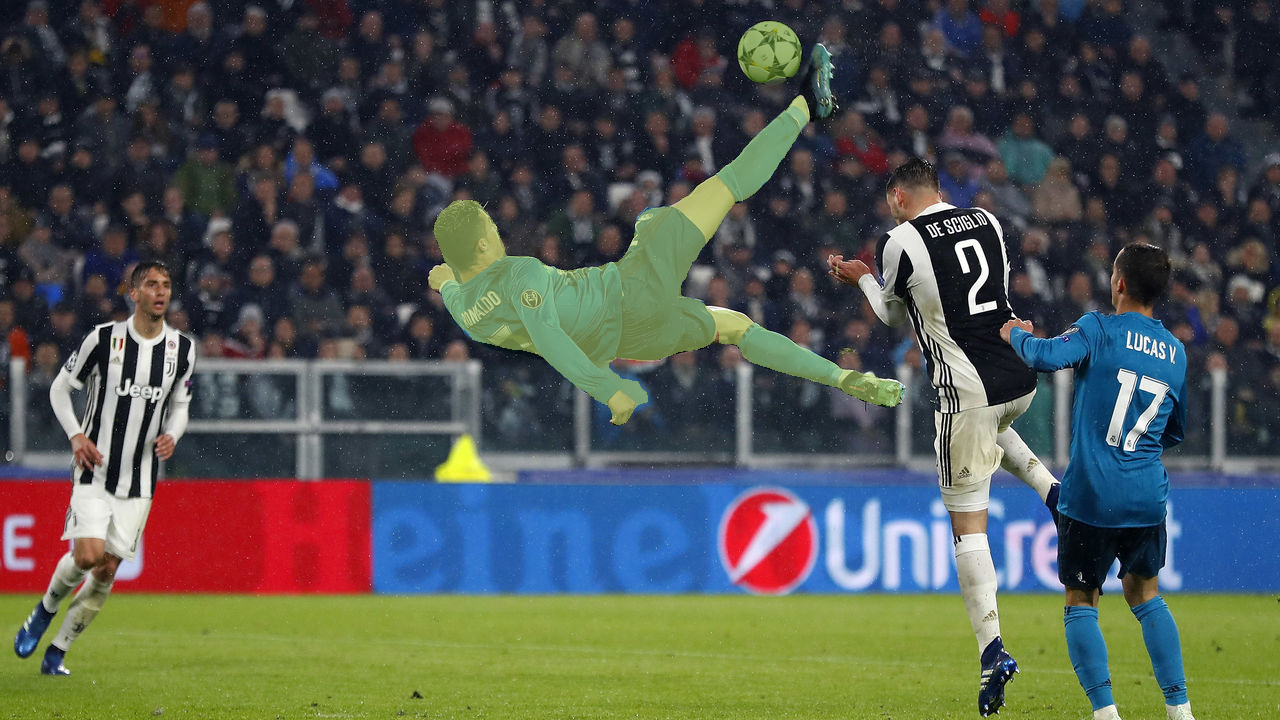

In [57]:
# Visualize the masks
show_masks_on_image(
    raw_image,
    masks
)